# Data Processor

In [4]:
from typing import Dict, List, Union
import matplotlib.pyplot as plt
import earthpy.plot as ep
import numpy as np
import rasterio
import pathlib
import re

In [5]:
def load_landsat_image(
    img_folder: Union[str, None],
    bands: Union[List[str], None]
) -> Dict:
    # Dictionary to save the image.
    images_dict = {}

    if img_folder:
        # Use the provided path.
        path = pathlib.Path(img_folder)
    else:
        # Get the path to retrieve.
        path = pathlib.Path(__file__).parent

    # Get the list of all files.
    files = [f.name for f in path.glob('**/*.tif')]
    # Parse all of filenames to get the unique ones.
    files = set([re.search('_[0-9](.*)[0-9]_', x).group() for x in files])
    # Dict of images to return.
    images_dict = {}

    # Iterate over the files.
    for pat in files:
        image = {}
        # Iterate over the bands.
        for band in bands:
            file = next(path.glob(f'*{pat}{band}.tif'))
            print(f'Opening file {file}')
            ds = rasterio.open(file)
            image.update({band: ds.read(1)})
        # Update the main dict.
        images_dict.update(
            {pat.replace('_','') : image}
        )

    return images_dict

def display_rgb(
    img: Union[Dict, None], 
    alpha=1., 
    figsize=(10, 10)
    ) -> None:
    rgb = np.stack(
        [img['B4'], img['B3'], img['B2']],
        axis=-1
    )
    rgb = rgb/rgb.max() * alpha
    plt.figure(figsize=figsize)
    plt.imshow(rgb)

In [6]:
# TODO: Changes these values for parameters on a database.
BASE_DIR = '/home/aargaez/github/Plant-Growth-Cycle-based-on-geospatial-data/ClimateDataTest/'
bands =  ['B4','B3','B2']

# Dict of the images.
images = load_landsat_image(BASE_DIR, bands)

Opening file /home/aargaez/github/Plant-Growth-Cycle-based-on-geospatial-data/ClimateDataTest/S-HARMONIZED_20210814T102031_20210814T102609_T32UNC_14Aug2021_B4.tif
Opening file /home/aargaez/github/Plant-Growth-Cycle-based-on-geospatial-data/ClimateDataTest/S-HARMONIZED_20210814T102031_20210814T102609_T32UNC_14Aug2021_B3.tif
Opening file /home/aargaez/github/Plant-Growth-Cycle-based-on-geospatial-data/ClimateDataTest/S-HARMONIZED_20210814T102031_20210814T102609_T32UNC_14Aug2021_B2.tif
Opening file /home/aargaez/github/Plant-Growth-Cycle-based-on-geospatial-data/ClimateDataTest/S-HARMONIZED_20210812T102559_20210812T103532_T32UND_12Aug2021_B4.tif
Opening file /home/aargaez/github/Plant-Growth-Cycle-based-on-geospatial-data/ClimateDataTest/S-HARMONIZED_20210812T102559_20210812T103532_T32UND_12Aug2021_B3.tif
Opening file /home/aargaez/github/Plant-Growth-Cycle-based-on-geospatial-data/ClimateDataTest/S-HARMONIZED_20210812T102559_20210812T103532_T32UND_12Aug2021_B2.tif
Opening file /home/aar

In [7]:
images['20210814T10203120210814T102609T32UNC14Aug2021']

{'B4': array([[ 195, 1310, 1492, ...,  343,  335,  344],
        [ 249, 1660, 1882, ...,  346,  331,  344],
        [ 329, 1592, 1884, ...,  340,  333,  324],
        ...,
        [2276, 2123, 2116, ..., 2212, 2141, 2152],
        [2255, 2171, 2084, ..., 2084, 2040, 2206],
        [2235, 2149, 2030, ..., 2040, 2073, 1851]], dtype=int32),
 'B3': array([[ 271, 1015, 1115, ...,  556,  550,  554],
        [ 366, 1262, 1399, ...,  552,  550,  561],
        [ 482, 1246, 1429, ...,  548,  537,  544],
        ...,
        [2176, 2055, 2014, ..., 1693, 1629, 1710],
        [2169, 2091, 2083, ..., 1585, 1526, 1669],
        [2187, 2074, 1963, ..., 1541, 1540, 1519]], dtype=int32),
 'B2': array([[ 164,  740,  823, ...,  331,  330,  332],
        [ 220,  914, 1012, ...,  337,  332,  330],
        [ 279,  897, 1037, ...,  337,  342,  331],
        ...,
        [2042, 1995, 1934, ..., 1282, 1220, 1317],
        [2064, 2008, 1756, ..., 1188, 1149, 1273],
        [2032, 1998, 1824, ..., 1155, 1143, 10

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


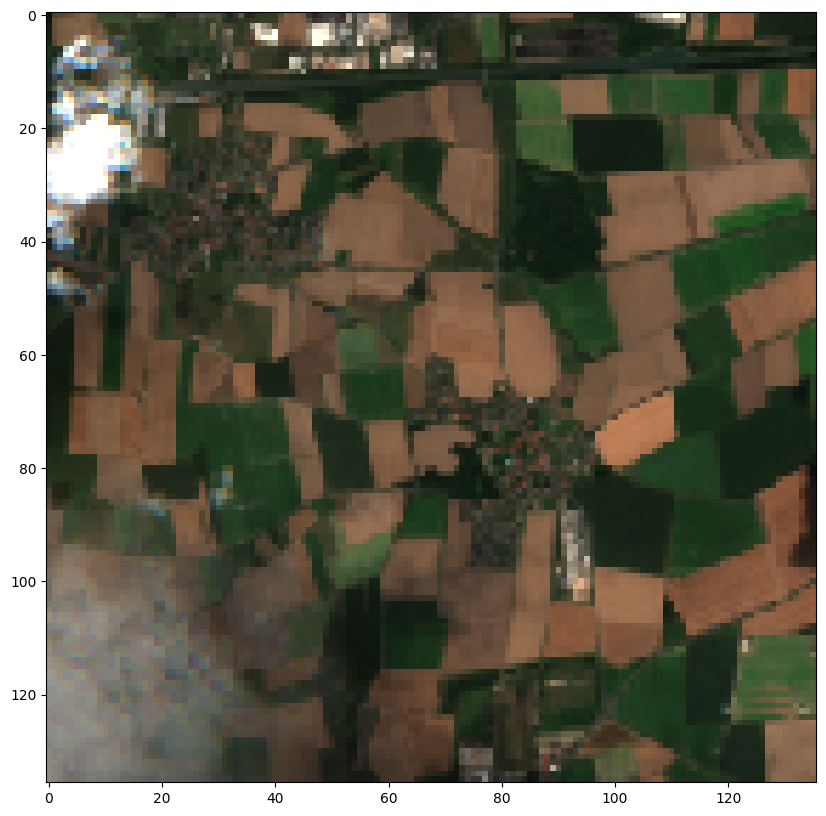

In [8]:
# Natural color
display_rgb(images['20210814T10203120210814T102609T32UNC14Aug2021'], alpha=2.)

In [9]:
image = images['20210814T10203120210814T102609T32UNC14Aug2021']

In [10]:
img_stack = np.stack([image['B4'], image['B3'], image['B2']], axis=0)

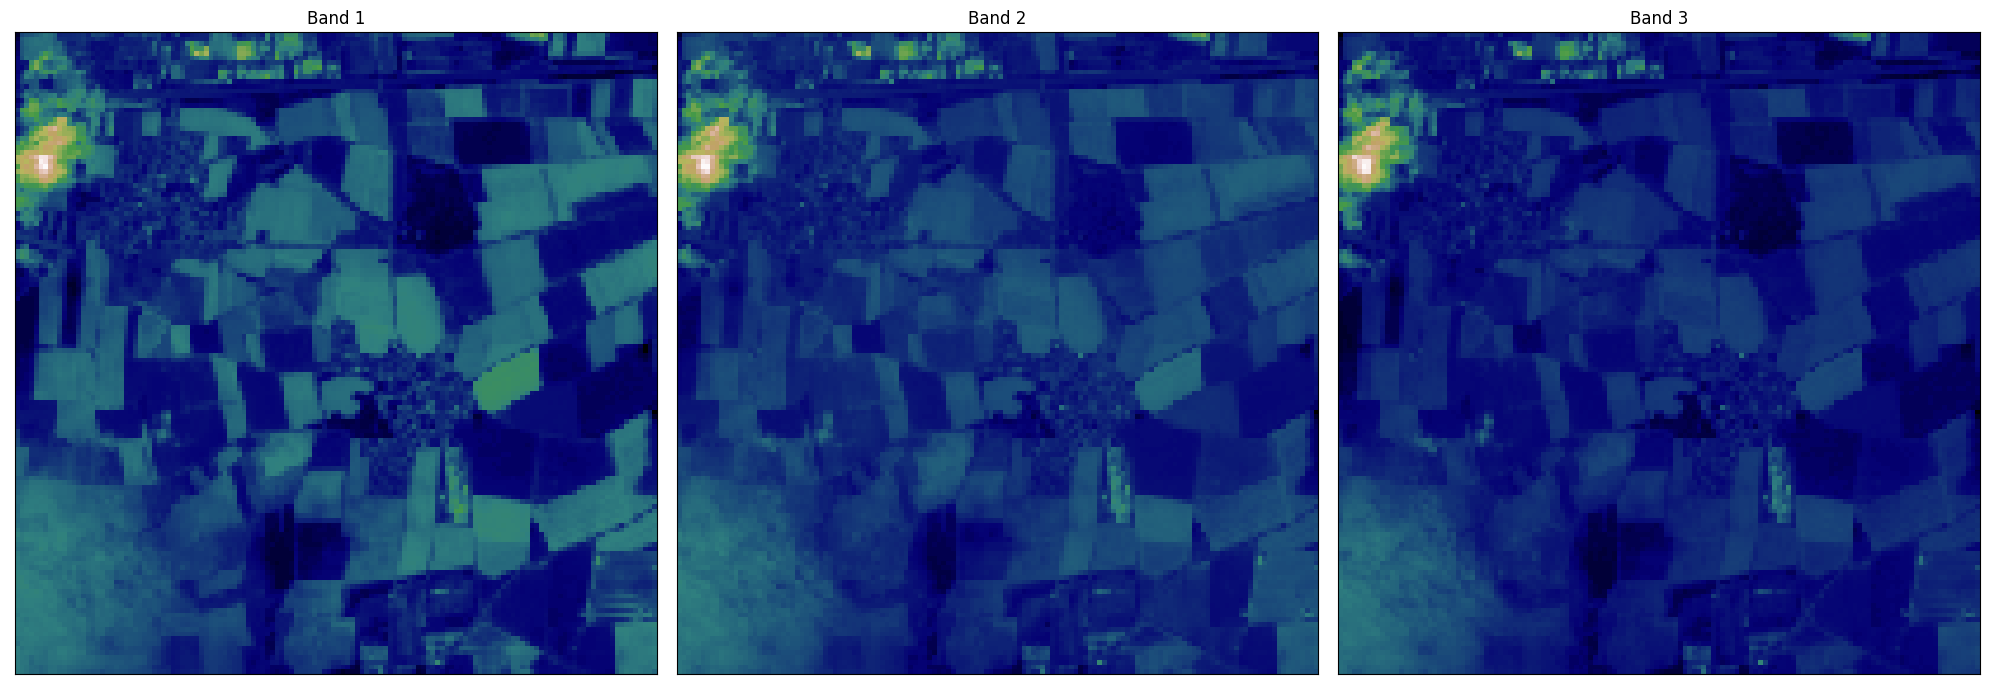

In [11]:
ep.plot_bands(img_stack, 
              cmap = 'gist_earth', 
              figsize = (20, 12), 
              cols = 3, 
              cbar = False)
plt.show()

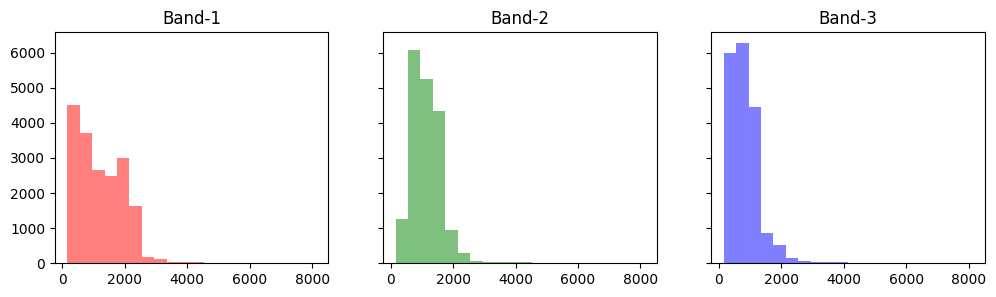

In [12]:
colors = ['red', 'green', 'blue']

ep.hist(img_stack, 
        colors = colors,
        title=[f'Band-{i}' for i in range(1, 4)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 3))

plt.show()

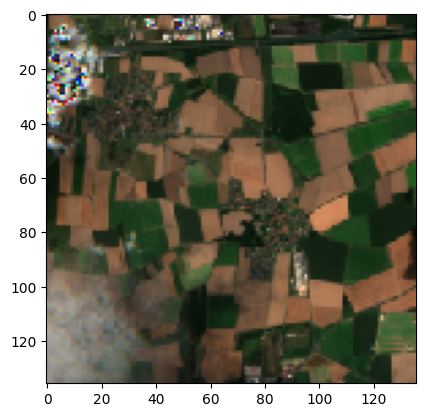

In [13]:
# Scale the data to [0, 255] to show as an RGB image.
# Adapted from https://bit.ly/2XlmQY8. Credits to Justin Braaten

img_stack_ = np.stack([image['B4'], image['B3'], image['B2']], axis=-1)
rgb_img_test = (255 * ((img_stack_[:, :, 0:3] - 100) / 3500)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()